# Hoeffding inequality

Run a computer simulation for flipping 1,000 virtual fair coins.  Flip each coin inde-pendently 10 times.  Focus on 3 coins as follows:

- c1 is the first coin flipped
- crand is a coin chosen randomly from the 1,000
- cmin is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie).  

Let ν1,νrand, and νmin be the fraction of heads obtained for the 3 respective coins out of the 10 tosses.

Run the experiment 100,000 times in order to get a full distribution of ν1, νrand, and νmin(note that crand and cmin will change from run to run).

In [34]:
import numpy as np

In [48]:
n_iters = 100000
n_coins = 1000
n_flips = 10

v1 = []
v2 = []
vmin = []

for _ in range(n_iters):
    
    # simulate coin flips
    coin_flips = np.random.randint(0,2, (n_coins,n_flips))
    
    # first coin
    c1 = 0
    # random coin
    c2 = np.random.randint(0, n_coins)
    # coin with minimum fraction of heads
    c3 = np.argmin(np.sum(coin_flips, axis=1))
    
    v1.append(np.mean(coin_flips[c1,:]))
    v2.append(np.mean(coin_flips[c2,:]))
    v3.append(np.mean(coin_flips[c3,:]))

In [49]:
np.mean(v3)

0.03747983820938484

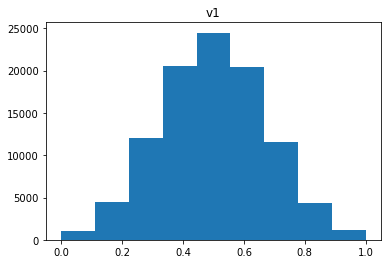

In [54]:
import matplotlib.pyplot as plt

plt.hist(v1, bins=np.linspace(0,1,10))
plt.title("v1")
plt.show()

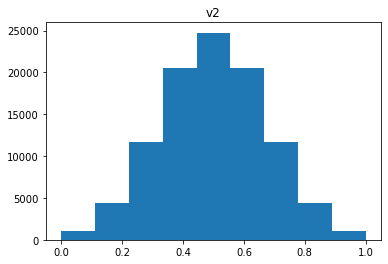

In [53]:
plt.hist(v2, bins=np.linspace(0, 1, 10))
plt.title("v2")
plt.show()

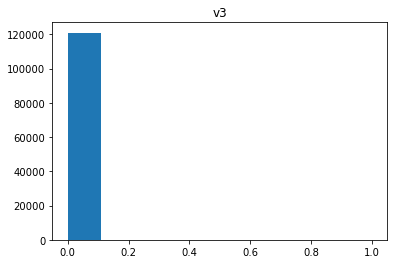

In [55]:
plt.hist(v3, bins=np.linspace(0,1,10))
plt.title("v3")
plt.show()